In [3]:
import pandas as pd
import numpy as np

# Data Handling

## Loading in data

In [4]:
X_train = np.loadtxt('data/train_data_set.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('data/test_data_set.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('data/train_label_set.csv', delimiter=',', skiprows=1).ravel()
y_test = np.loadtxt('data/test_label_set.csv', delimiter=',', skiprows=1).ravel()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12699, 784), (2166, 784), (12699,), (2166,))

## Testing the function

In [5]:
from handle_data import load_data
X_train, y_train, X_test, y_test = load_data('data')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12699, 784), (2166, 784), (12699,), (2166,))

## Exploring the data

Text(0.5, 1.0, '0.0')

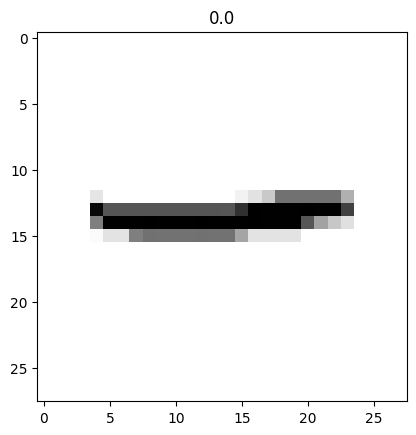

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1100].reshape((28,28)),cmap='binary')
plt.title(f'{y_train[1100]}')

# Machine Learning

## Testing the ml.py

In [1]:
from handle_data import load_data
import ml as ml
import numpy as np

X_train, y_train, X_test, y_test = load_data('data')

input_size = X_train.shape[1]

zeroth_layer = ml.Layer(input_size, input_size)
first_layer = ml.Layer(input_size, 100)
second_layer = ml.Layer(100,10)
third_layer = ml.Layer(10,1)

a_0 = zeroth_layer.forward(X_train.T)
a_1 = first_layer.forward(a_0)
a_2 = second_layer.forward(a_1)
a_3 = third_layer.forward(a_2)



a_2.shape, first_layer.W.shape, a_0.shape, first_layer.b.shape

((10, 12699), (100, 784), (784, 12699), (100, 1))

In [6]:
from handle_data import load_data
import ml as ml
import numpy as np

X_train, y_train, X_test, y_test = load_data('data')

input_size = X_train.shape[1]

model = ml.NeuralNetwork([input_size, 100, 100, 1], ['relu', 'relu', 'relu'])
model.train(X_train.T, y_train.reshape(1,-1), epochs=100, cost_fn='l1_reg_mse',reg_lambda=0)

Epoch 0; Loss 2183.3894280348472


In [7]:
[layer.W for layer in model.layers]

[array([[-0.15845045,  0.69583759, -0.42203963, ..., -0.42577503,
          0.50564225, -0.67275474],
        [ 0.7321872 , -0.30958468,  0.25603444, ..., -0.92489304,
         -0.12861363, -2.01585092],
        [-0.74658876, -0.94858717, -1.14842698, ...,  0.65340061,
         -0.58699498, -0.42689968],
        ...,
        [ 0.3935111 ,  0.8738005 , -0.24189664, ...,  0.70716333,
         -0.34254756, -1.65768261],
        [-2.87285547, -1.47354136, -1.36362933, ..., -1.71211422,
         -0.08728313,  2.25719879],
        [-1.17066365, -0.17554141, -0.1563606 , ...,  2.67783559,
          0.03460661,  1.18536428]]),
 array([[ 7.84433158e-01,  1.17473927e+00,  1.92390552e+00, ...,
          2.12851658e+00,  6.36213052e-01, -1.43913620e+00],
        [-4.97667583e-01, -4.18849135e-01,  9.69446325e-02, ...,
          5.47086030e-01,  1.00145223e+00,  1.29484340e+00],
        [-1.39739457e-01,  1.02131972e-01, -1.08015623e+00, ...,
          5.70829369e-01,  1.48955912e+00, -5.74253497e-

Text(0, 0.5, 'Loss')

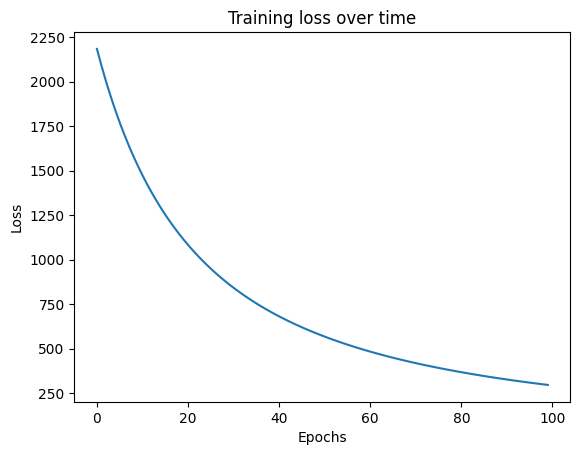

In [10]:
import matplotlib.pyplot as plt

plt.plot(model.training_cache.keys(), model.training_cache.values())
plt.title('Training loss over time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Part 2

In [1]:
from handle_data import load_data
import ml as ml
import numpy as np

X_train, y_train, X_test, y_test = load_data('data')

input_size = X_train.shape[1]
layer_list = [input_size]
layer_list.extend([50]*5)
layer_list.extend([20]*5)
layer_list.extend([10]*5)
layer_list.extend([5]*4)
layer_list.extend([1])
activation_fn_list = ['relu_cubed']*20

# relu_cubed activation function with 20 layers of 10 width and then 5
model = ml.NeuralNetwork(layer_list, activation_fn_list)
model.train(X_train.T, y_train.reshape(1,-1), epochs=100, cost_fn='l1_reg_mse',reg_lambda=0)

c:\Users\hanse\OneDrive - University of Florida\Desktop\DesktopRepo\or3-project2-ann\ml.py:17: RuntimeWarning: overflow encountered in power
  return np.power(np.maximum(x,0),3)
c:\Users\hanse\OneDrive - University of Florida\Desktop\DesktopRepo\or3-project2-ann\ml.py:83: RuntimeWarning: invalid value encountered in matmul
  self.Z = self.W @ X + self.b
c:\Users\hanse\OneDrive - University of Florida\Desktop\DesktopRepo\or3-project2-ann\ml.py:21: RuntimeWarning: overflow encountered in power
  return 3 * np.power(np.maximum(x,0),2) * (x > 0).astype(np.float32)


Epoch 0; Loss nan
Epoch 10; Loss nan
Epoch 20; Loss nan
Epoch 30; Loss nan
Epoch 40; Loss nan
Epoch 50; Loss nan
Epoch 60; Loss nan
Epoch 70; Loss nan
Epoch 80; Loss nan
Epoch 90; Loss nan


In [11]:
y_pred = model.forward(X_test.T)

accuracy = np.mean((y_pred > 0.5) == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 55.77%
